## data

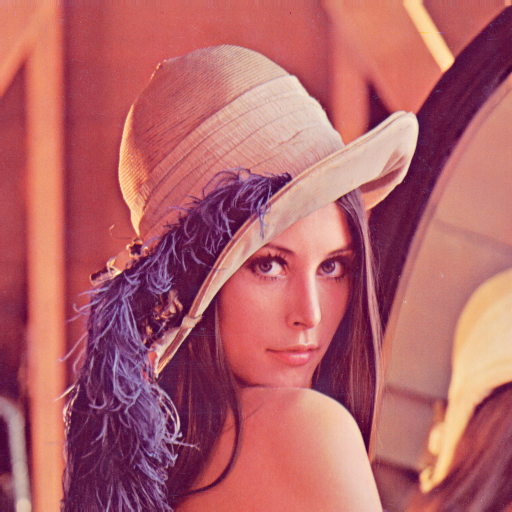

In [1]:
from PIL import Image

# Load image
img = Image.open('images/lena.png')
img

In [2]:
img.size, img.mode, img.format

((512, 512), 'RGB', 'PNG')

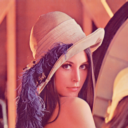

In [3]:
from torchvision import transforms
transforms.Compose([
    transforms.Resize(128),
])(img)

## model

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Create Decoder
# input a 1D tensor of shape (3,1,1)
# output a 2D tensor of shape (3,256,256)
decoder = nn.Sequential(
    nn.ConvTranspose2d(
        in_channels = 3, 
        out_channels = 3, 
        kernel_size = 32
    ), # (3,1,1) -> (3,32,32)
    nn.ReLU(),
    nn.ConvTranspose2d(
        in_channels = 3, 
        out_channels = 3, 
        kernel_size = 3,
        stride = 2,
        padding = 1,
        output_padding = 1
    ),# (3,32,32) -> (3,64,64)
    nn.ReLU(),
    nn.ConvTranspose2d(
        in_channels = 3, 
        out_channels = 3, 
        kernel_size = 3,
        stride = 2,
        padding = 1,
        output_padding = 1
    ),# (3,32,32) -> (3,128,128)
    nn.Sigmoid() # To get values between 0 and 1 for pixel values 
)

# Create transform
transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor()
])

learning_rate = 0.01
loss = nn.MSELoss()
optimizer = optim.Adam(decoder.parameters(), lr=learning_rate)

In [5]:
token = torch.randn(3).reshape(3,1,1)

In [6]:
token, token.shape

(tensor([[[ 0.4863]],
 
         [[-0.6236]],
 
         [[ 0.4927]]]),
 torch.Size([3, 1, 1]))

## example

In [7]:
pred_image = decoder(token)
pred_image.shape

torch.Size([3, 128, 128])

In [8]:
pred_image

tensor([[[0.4566, 0.4556, 0.4568,  ..., 0.4558, 0.4566, 0.4562],
         [0.4563, 0.4565, 0.4563,  ..., 0.4566, 0.4564, 0.4570],
         [0.4567, 0.4555, 0.4569,  ..., 0.4559, 0.4566, 0.4562],
         ...,
         [0.4563, 0.4565, 0.4563,  ..., 0.4567, 0.4563, 0.4571],
         [0.4566, 0.4557, 0.4567,  ..., 0.4558, 0.4566, 0.4562],
         [0.4566, 0.4562, 0.4567,  ..., 0.4564, 0.4566, 0.4567]],

        [[0.5397, 0.5395, 0.5396,  ..., 0.5396, 0.5397, 0.5396],
         [0.5396, 0.5400, 0.5395,  ..., 0.5400, 0.5396, 0.5398],
         [0.5396, 0.5395, 0.5395,  ..., 0.5397, 0.5397, 0.5397],
         ...,
         [0.5396, 0.5400, 0.5395,  ..., 0.5400, 0.5396, 0.5398],
         [0.5397, 0.5396, 0.5396,  ..., 0.5396, 0.5397, 0.5396],
         [0.5395, 0.5402, 0.5394,  ..., 0.5401, 0.5395, 0.5398]],

        [[0.4687, 0.4679, 0.4687,  ..., 0.4681, 0.4687, 0.4684],
         [0.4689, 0.4691, 0.4690,  ..., 0.4690, 0.4689, 0.4687],
         [0.4687, 0.4678, 0.4687,  ..., 0.4682, 0.4687, 0.

In [9]:
pred_image_np = pred_image.detach().numpy()

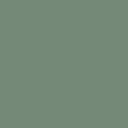

In [10]:
import numpy as np
# 将其使用PIL.Image打开
Image.fromarray((pred_image_np*255).astype(np.uint8).transpose(1,2,0))

In [11]:
ture_image = transform(img)

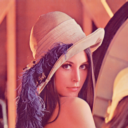

In [12]:
true_image_np = ture_image.detach().numpy()
Image.fromarray((true_image_np*255).astype(np.uint8).transpose(1,2,0))

## train

In [13]:
from torch.utils.tensorboard import SummaryWriter

# Create SummaryWriter instance
writer = SummaryWriter('my_experiment')

num_epochs = 200

In [14]:
for epoch in range(num_epochs):
    pred_image = decoder(token)
    loss_value = loss(pred_image, ture_image)
    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f'epoch: {epoch}, loss: {loss_value.item()}')

    # Add loss to tensorboard
    writer.add_scalar('Loss', loss_value.item(), epoch)
    if epoch % 10 == 0:
        # Add image to tensorboard
        writer.add_image('Pred Image', pred_image, epoch)

epoch: 0, loss: 0.059153106063604355
epoch: 20, loss: 0.036315541714429855
epoch: 40, loss: 0.02880139835178852
epoch: 60, loss: 0.02761424146592617
epoch: 80, loss: 0.027035504579544067
epoch: 100, loss: 0.02572031132876873
epoch: 120, loss: 0.021171411499381065
epoch: 140, loss: 0.014974362216889858
epoch: 160, loss: 0.006512210238724947
epoch: 180, loss: 0.0031888235826045275


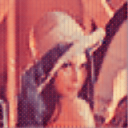

In [15]:
Image.fromarray((pred_image.detach().numpy()*255).astype(np.uint8).transpose(1,2,0))